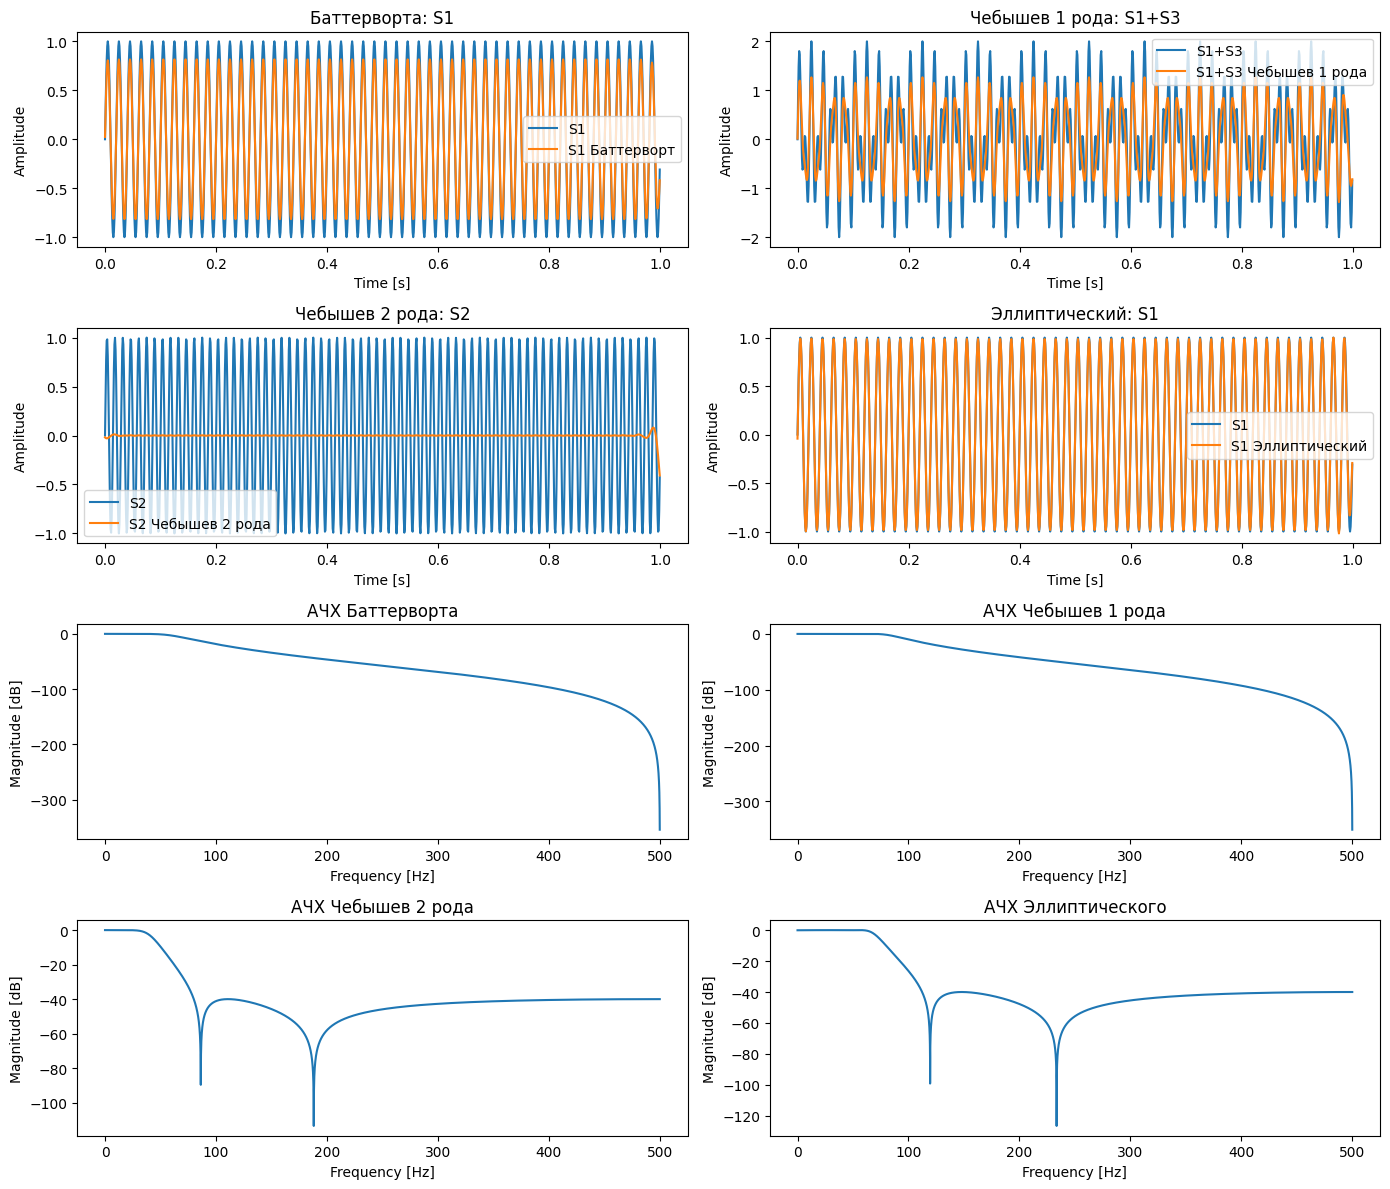

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, cheby1, cheby2, ellip, filtfilt, freqz

Fs = 1000  # Hz
t = np.arange(0, 1, 1/Fs)  # 1s

S1 = np.sin(2*np.pi*50*t)
S2 = np.sin(2*np.pi*70*t)
S3 = np.sin(2*np.pi*90*t)

n = 4        
PR = 0.1     
SR = 40      

Fc_bw = 60  # частота среза, Гц
Wn_bw = Fc_bw/(Fs/2)
b_bw, a_bw = butter(n, Wn_bw, btype='low')
S1_bw = filtfilt(b_bw, a_bw, S1)

S1S3 = S1 + S3
Fc_c1 = 70  # частота среза, Гц
Wn_c1 = Fc_c1/(Fs/2)
b_c1, a_c1 = cheby1(n, PR, Wn_c1, btype='low')
S1S3_c1 = filtfilt(b_c1, a_c1, S1S3)

Fc_c2 = 80  # частота среза, Гц
Wn_c2 = Fc_c2/(Fs/2)
b_c2, a_c2 = cheby2(n, SR, Wn_c2, btype='low')
S2_c2 = filtfilt(b_c2, a_c2, S2)

Fc_ellip = 60
Wn_ellip = Fc_ellip/(Fs/2)
b_ellip, a_ellip = ellip(n, PR, SR, Wn_ellip, btype='low')
S1_ellip = filtfilt(b_ellip, a_ellip, S1)


plt.figure(figsize=(14, 12))

plt.subplot(4,2,1)
plt.plot(t, S1, label='S1')
plt.plot(t, S1_bw, label='S1 Баттерворт')
plt.title('Баттерворта: S1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4,2,2)
plt.plot(t, S1S3, label='S1+S3')
plt.plot(t, S1S3_c1, label='S1+S3 Чебышев 1 рода')
plt.title('Чебышев 1 рода: S1+S3')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4,2,3)
plt.plot(t, S2, label='S2')
plt.plot(t, S2_c2, label='S2 Чебышев 2 рода')
plt.title('Чебышев 2 рода: S2')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4,2,4)
plt.plot(t, S1, label='S1')
plt.plot(t, S1_ellip, label='S1 Эллиптический')
plt.title('Эллиптический: S1')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

w_bw, h_bw = freqz(b_bw, a_bw, worN=8000)
w_c1, h_c1 = freqz(b_c1, a_c1, worN=8000)
w_c2, h_c2 = freqz(b_c2, a_c2, worN=8000)
w_ellip, h_ellip = freqz(b_ellip, a_ellip, worN=8000)

plt.subplot(4,2,5)
plt.plot(w_bw*Fs/(2*np.pi), 20*np.log10(abs(h_bw)))
plt.title('АЧХ Баттерворта')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')

plt.subplot(4,2,6)
plt.plot(w_c1*Fs/(2*np.pi), 20*np.log10(abs(h_c1)))
plt.title('АЧХ Чебышев 1 рода')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')

plt.subplot(4,2,7)
plt.plot(w_c2*Fs/(2*np.pi), 20*np.log10(abs(h_c2)))
plt.title('АЧХ Чебышев 2 рода')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')

plt.subplot(4,2,8)
plt.plot(w_ellip*Fs/(2*np.pi), 20*np.log10(abs(h_ellip)))
plt.title('АЧХ Эллиптического')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')

plt.tight_layout()
plt.show()


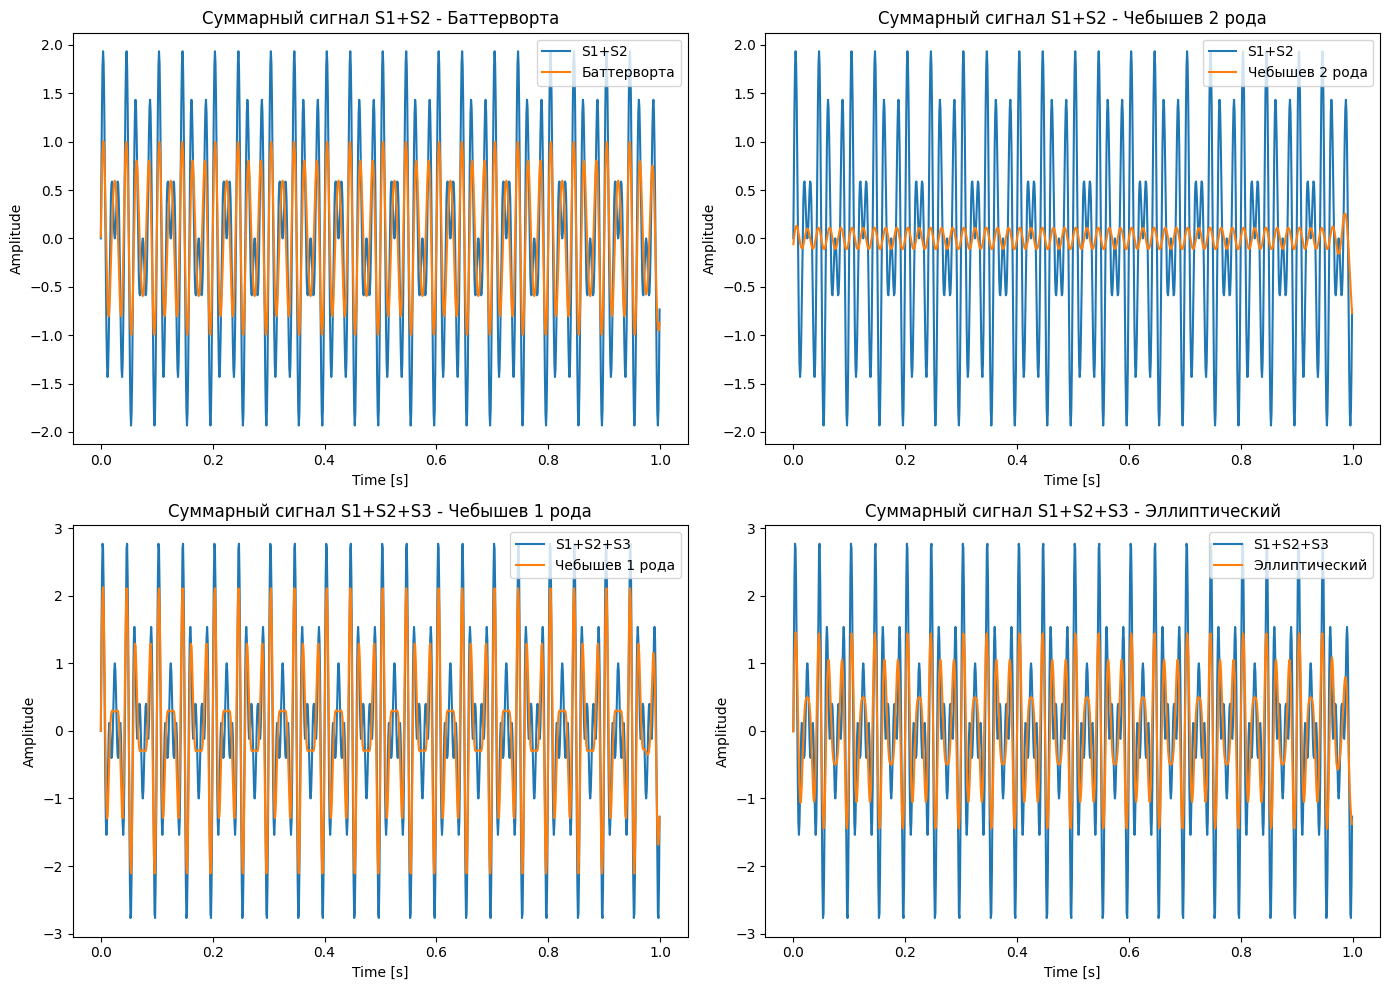

In [4]:
# ----------------------------
# 5. Фильтрация суммарных сигналов S1+S2 и S1+S2+S3
# ----------------------------
S12 = S1 + S2
S123 = S1 + S2 + S3

# Баттерворта (фильтруем S1)
S12_bw_sum = filtfilt(b_bw, a_bw, S12)
S123_bw_sum = filtfilt(b_bw, a_bw, S123)

# Чебышева 1 рода (фильтруем S1+S3) на S123
S123_c1_sum = filtfilt(b_c1, a_c1, S123)

# Чебышева 2 рода (фильтруем S2)
S12_c2_sum = filtfilt(b_c2, a_c2, S12)
S123_c2_sum = filtfilt(b_c2, a_c2, S123)

# Эллиптический (фильтруем S1)
S12_ellip_sum = filtfilt(b_ellip, a_ellip, S12)
S123_ellip_sum = filtfilt(b_ellip, a_ellip, S123)

# ----------------------------
# 6. Построение графиков суммарных сигналов
# ----------------------------
plt.figure(figsize=(14, 10))

plt.subplot(2,2,1)
plt.plot(t, S12, label='S1+S2')
plt.plot(t, S12_bw_sum, label='Баттерворта')
plt.title('Суммарный сигнал S1+S2 - Баттерворта')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2,2,2)
plt.plot(t, S12, label='S1+S2')
plt.plot(t, S12_c2_sum, label='Чебышев 2 рода')
plt.title('Суммарный сигнал S1+S2 - Чебышев 2 рода')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2,2,3)
plt.plot(t, S123, label='S1+S2+S3')
plt.plot(t, S123_c1_sum, label='Чебышев 1 рода')
plt.title('Суммарный сигнал S1+S2+S3 - Чебышев 1 рода')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2,2,4)
plt.plot(t, S123, label='S1+S2+S3')
plt.plot(t, S123_ellip_sum, label='Эллиптический')
plt.title('Суммарный сигнал S1+S2+S3 - Эллиптический')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


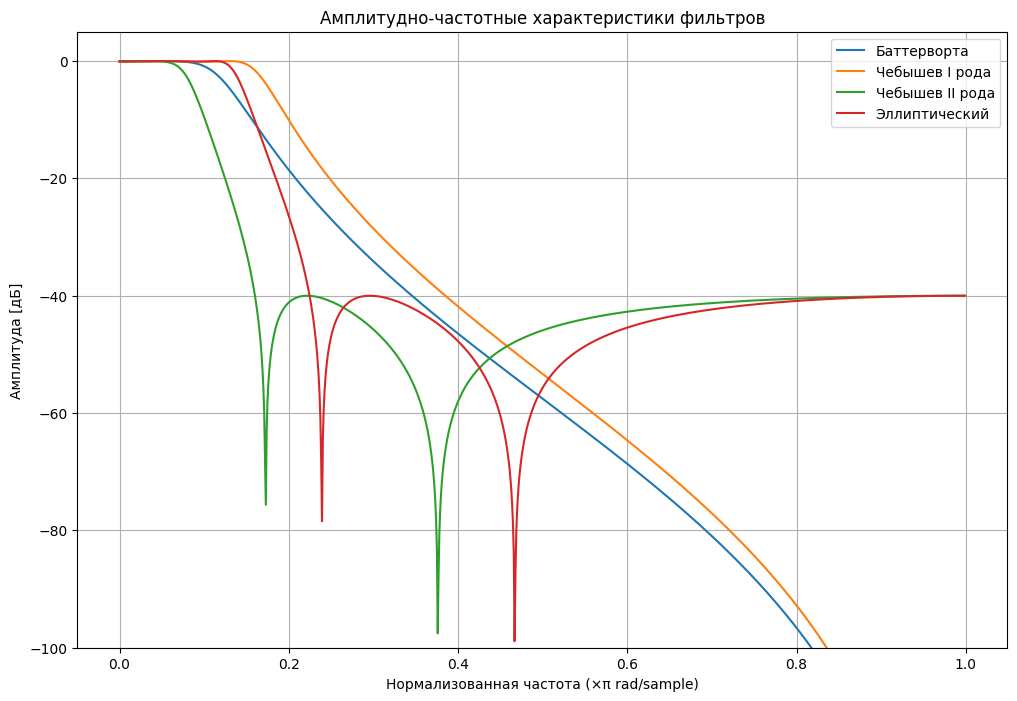

In [5]:
# Баттерворта
w, h_bw = freqz(b_bw, a_bw, worN=1024)
# Чебышев 1 рода
w, h_c1 = freqz(b_c1, a_c1, worN=1024)
# Чебышев 2 рода
w, h_c2 = freqz(b_c2, a_c2, worN=1024)
# Эллиптический
w, h_ellip = freqz(b_ellip, a_ellip, worN=1024)

# Построение графика АЧХ
plt.figure(figsize=(12, 8))

plt.plot(w/np.pi, 20*np.log10(abs(h_bw)), label='Баттерворта')
plt.plot(w/np.pi, 20*np.log10(abs(h_c1)), label='Чебышев I рода')
plt.plot(w/np.pi, 20*np.log10(abs(h_c2)), label='Чебышев II рода')
plt.plot(w/np.pi, 20*np.log10(abs(h_ellip)), label='Эллиптический')

plt.title("Амплитудно-частотные характеристики фильтров")
plt.xlabel("Нормализованная частота (×π rad/sample)")
plt.ylabel("Амплитуда [дБ]")
plt.ylim(-100, 5)
plt.grid(True)
plt.legend()
plt.show()